In [1]:
%matplotlib notebook
#%matplotlib inline
import sys
sys.path.append("../../CellTemplate")
import matplotlib.pyplot as plt
import os
import numpy as np
import json
import argparse
import torch
from torch.optim import lr_scheduler
from tqdm import tqdm
from data_loader import data_loaders as module_data
from model import loss as module_loss
from model import metric as module_metric
from model import model as module_arch
from trainer import Trainer
from utils import Logger
from utils import util
from utils import torchsummary
from utils import viewTraining
from utils import lr_finder
from utils import classActivationMap
import importlib
import math
import torchvision
from torch.nn import functional as F
from torch import topk
import skimage.transform
import jupyter
from IPython import display
from ipywidgets import *
from utils import hyperband as HypOpt
import argparse
print("Modules loaded")


importlib.reload(module_data) #load recent changes to data_loaders.py
importlib.reload(module_arch)
importlib.reload(module_loss)
importlib.reload(module_metric)
importlib.reload(util)
importlib.reload(viewTraining)
importlib.reload(lr_finder)
importlib.reload(classActivationMap)
importlib.reload(HypOpt)
print("Reload complete")

print("GPUs available: " + str(torch.cuda.device_count()))
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

C:\Users\awoloshu\Documents\pytorch36\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


Modules loaded
Reload complete
GPUs available: 1


In [2]:
params = {
    "num_feature": [4, 8, 16,32],
    "batch_size": [4, 8, 16, 32, 64, 128, 256],
    #"optim_type": ['adam', 'sgd'],
    "lr": [0.00001, 0.1],
    "weight_decay": [0.00001, 0.01],
    "step_size": [20, 150],
    "gamma": [0.05, 0.5]
}

def get_instance(module, name, config, *args):
    return getattr(module, config[name]['type'])(*args, **config[name]['args'])

config_file = '..\\configs\\config_hdf5_hypop.json'

# load config file
with open(config_file) as handle:
    config = json.load(handle)
# setting path to save trained models and log files
path = os.path.join(config['trainer']['save_dir'], config['name'])
print("loaded")

args = argparse.ArgumentParser()
args.epoch_scale = 1
args.max_iter = 81
args.eta = 3
args.num_gpu = 1

loaded


Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


Total number of training images = 2071


<IPython.core.display.Javascript object>


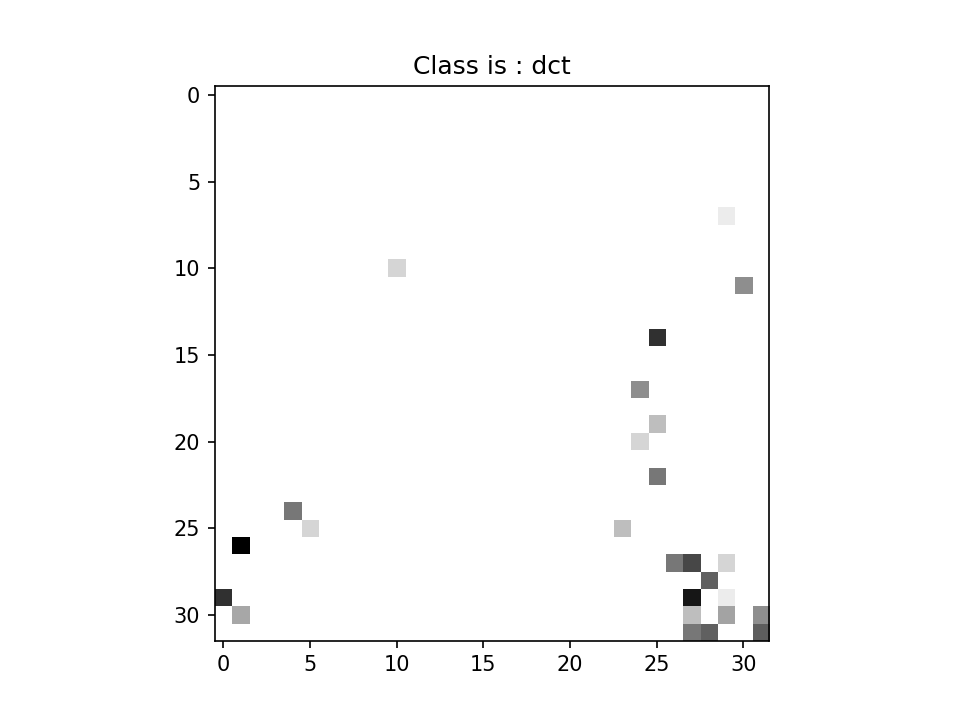

interactive(children=(IntSlider(value=0, description='layer', max=6), Output()), _dom_classes=('widget-interac…

In [3]:
data_loader = getattr(module_data, config['data_loader_test']['type'])(
    config['data_loader']['args']['hdf5_path'],
    batch_size=1,
    shuffle=True,
    validation_split=0.0,
    training=False,
    num_workers=0)
print("Total number of training images = " + str(data_loader.dataset.data_len))
valid_data_loader = data_loader.split_validation() #allocate some images as validation

normalized = False
util.visualizeBatch(data_loader, normalized) 

In [5]:
ho = HypOpt.HyperOptim(args, params, config)
data_loader.batch_size = 2
print(data_loader.batch_size)

[*] max_iter: 81, eta: 3, B: 405


ValueError: batch_size attribute should not be set after hdf5_3d_dataloader is initialized

In [9]:
ho.tune(1)

s: 2
[*] 1/3 - running 25 configs for 1 iters each


  0%|          | 0/25 [00:00<?, ?it/s]    epoch          : 1
    loss           : 1.2695490990616576
    balanced_accuracy: 0.4062526812526811
    val_loss       : 1.4376846924741218
    val_balanced_accuracy: 0.370466903073286


Model best! ---------------------------| 


  4%|▍         | 1/25 [00:52<20:57, 52.40s/it]    epoch          : 1
    loss           : 1.623007668716583
    balanced_accuracy: 0.3008337284653069
    val_loss       : 1.767731151982411
    val_balanced_accuracy: 0.27771855010660956


Model best! ---------------------------| 


  8%|▊         | 2/25 [02:33<25:42, 67.06s/it]    epoch          : 1
    loss           : 1.1252290588436704
    balanced_accuracy: 0.5110977426288412
    val_loss       : 0.7651748657226562
    val_balanced_accuracy: 0.5917949991970305


Model best! ---------------------------| 


 12%|█▏        | 3/25 [02:40<18:01, 49.14s/it]    epoch          : 1
    loss           : 1.0214246745640632
    balanced_accuracy: 0.5210982979193884
    val_loss       : 0.8610664535376985
    val_balanced_accuracy: 0.5863659343638156


Model best! ---------------------------| 


 16%|█▌        | 4/25 [03:07<14:47, 42.24s/it]    epoch          : 1
    loss           : 1.618047103264593
    balanced_accuracy: 0.2918247194562983
    val_loss       : 1.410238066461803
    val_balanced_accuracy: 0.38415067519545154


Model best! ---------------------------| 


 20%|██        | 5/25 [04:44<19:35, 58.79s/it]    epoch          : 1
    loss           : 1.0410232268499606
    balanced_accuracy: 0.5428583163785788
    val_loss       : 0.6649556835492452
    val_balanced_accuracy: 0.7074067103546641


Model best! ---------------------------| 


 24%|██▍       | 6/25 [04:52<13:49, 43.66s/it]    epoch          : 1
    loss           : 0.8758590871637518
    balanced_accuracy: 0.5850068078631309
    val_loss       : 0.7855309778350895
    val_balanced_accuracy: 0.5794121603443643


Model best! ---------------------------| 


 28%|██▊       | 7/25 [05:08<10:32, 35.14s/it]    epoch          : 1
    loss           : 0.9286609228813287
    balanced_accuracy: 0.5433774579572983
    val_loss       : 0.7908162434895833
    val_balanced_accuracy: 0.5737976807397446


Model best! ---------------------------| 


 32%|███▏      | 8/25 [05:15<07:34, 26.76s/it]    epoch          : 1
    loss           : 1.1175295069362179
    balanced_accuracy: 0.49725900537082957
    val_loss       : 0.746931391954422
    val_balanced_accuracy: 0.5957604842124966


Model best! ---------------------------| 


 36%|███▌      | 9/25 [05:24<05:45, 21.58s/it]    epoch          : 1
    loss           : 0.8766193812092146
    balanced_accuracy: 0.5638938938114325
    val_loss       : 3.012295198440552
    val_balanced_accuracy: 0.36360728996304453


Model best! ---------------------------| 


 40%|████      | 10/25 [05:38<04:49, 19.27s/it]    epoch          : 1
    loss           : 0.9126638065684926
    balanced_accuracy: 0.5495485485979525
    val_loss       : 1.1707846422990162
    val_balanced_accuracy: 0.4649028941990242


Model best! ---------------------------| 


 44%|████▍     | 11/25 [05:52<04:08, 17.75s/it]    epoch          : 1
    loss           : 1.3195346371575858
    balanced_accuracy: 0.41249125064914577
    val_loss       : 1.3345476290012928
    val_balanced_accuracy: 0.2824113475177305


Model best! ---------------------------| 


 48%|████▊     | 12/25 [06:42<05:53, 27.22s/it]    epoch          : 1
    loss           : 1.2502051799586325
    balanced_accuracy: 0.46402534311057775
    val_loss       : 0.8299522995948792
    val_balanced_accuracy: 0.6103783044724297


Model best! ---------------------------| 


 52%|█████▏    | 13/25 [06:49<04:14, 21.17s/it]    epoch          : 1
    loss           : 1.1610414190646199
    balanced_accuracy: 0.4930597891124203
    val_loss       : 0.7733686742630411
    val_balanced_accuracy: 0.5687943262411349


Model best! ---------------------------| 


 56%|█████▌    | 14/25 [07:39<05:28, 29.87s/it]    epoch          : 1
    loss           : 1.005279884419658
    balanced_accuracy: 0.5269798186305659
    val_loss       : 3.175147231419881
    val_balanced_accuracy: 0.20588705016908687


Model best! ---------------------------| 


 60%|██████    | 15/25 [07:49<04:00, 24.02s/it]    epoch          : 1
    loss           : 1.1774482090364804
    balanced_accuracy: 0.4505167592076978
    val_loss       : 6.086606878345296
    val_balanced_accuracy: 0.19576271186440664


Model best! ---------------------------| 


 64%|██████▍   | 16/25 [08:03<03:08, 20.98s/it]    epoch          : 1
    loss           : 1.3543356880863564
    balanced_accuracy: 0.45438201359253966
    val_loss       : 1.1101608805056573
    val_balanced_accuracy: 0.5335820895522384


Model best! ---------------------------| 


 68%|██████▊   | 17/25 [09:39<05:48, 43.55s/it]    epoch          : 1
    loss           : 1.3932475337998005
    balanced_accuracy: 0.37875187217292483
    val_loss       : 1.1797446834280136
    val_balanced_accuracy: 0.4291312056737588


Model best! ---------------------------| 


 72%|███████▏  | 18/25 [10:29<05:17, 45.38s/it]    epoch          : 1
    loss           : 1.1695814864201979
    balanced_accuracy: 0.4620951595721815
    val_loss       : 1.1514442734799142
    val_balanced_accuracy: 0.5739983086593259


Model best! ---------------------------| 


 76%|███████▌  | 19/25 [10:44<03:38, 36.34s/it]    epoch          : 1
    loss           : 0.959775345343532
    balanced_accuracy: 0.5294203559243471
    val_loss       : 3.084993108113607
    val_balanced_accuracy: 0.20293182957393488


Model best! ---------------------------| 


 80%|████████  | 20/25 [10:51<02:17, 27.53s/it]    epoch          : 1
    loss           : 1.511573482105211
    balanced_accuracy: 0.3482134390029122
    val_loss       : 1.2416645225058212
    val_balanced_accuracy: 0.37865248226950354


Model best! ---------------------------| 


 84%|████████▍ | 21/25 [11:40<02:15, 33.86s/it]    epoch          : 1
    loss           : 1.7234943803274387
    balanced_accuracy: 0.2667733522996684
    val_loss       : 1.5189166104615623
    val_balanced_accuracy: 0.30561478322672364


Model best! ---------------------------| 


 88%|████████▊ | 22/25 [13:18<02:39, 53.25s/it]    epoch          : 1
    loss           : 1.0647464676788359
    balanced_accuracy: 0.49221486785143603
    val_loss       : 3.0797059138615928
    val_balanced_accuracy: 0.37750261661714973


Model best! ---------------------------| 


 92%|█████████▏| 23/25 [13:28<01:20, 40.05s/it]    epoch          : 1
    loss           : 0.8281035143317599
    balanced_accuracy: 0.5695600391728962
    val_loss       : 1.4391096909840901
    val_balanced_accuracy: 0.3531193339967826


Model best! ---------------------------| 


 96%|█████████▌| 24/25 [13:39<00:31, 31.47s/it]    epoch          : 1
    loss           : 0.9890370897271417
    balanced_accuracy: 0.5381581050021198
    val_loss       : 0.7705947836240132
    val_balanced_accuracy: 0.6518863845638915


Model best! ---------------------------| 


100%|██████████| 25/25 [13:46<00:00, 33.07s/it]


Left with: 5
[*] 2/3 - running 5 configs for 5 iters each


  0%|          | 0/5 [00:00<?, ?it/s]    epoch          : 1
    loss           : 1.025035963365526
    balanced_accuracy: 0.5842470552905923
    val_loss       : 0.65264839331309
    val_balanced_accuracy: 0.7263032821129378


Model best! ---------------------------| 


    epoch          : 2
    loss           : 0.6761522478226459
    balanced_accuracy: 0.709938270221176
    val_loss       : 0.6718861738840739
    val_balanced_accuracy: 0.7192854718917964


Model has not improved in -------------| 1 epochs


    epoch          : 3
    loss           : 0.6027519264907548
    balanced_accuracy: 0.7468749887626706
    val_loss       : 0.5043799559275309
    val_balanced_accuracy: 0.7936427856824747


Model best! ---------------------------| 


    epoch          : 4
    loss           : 0.5374335538257252
    balanced_accuracy: 0.7801872243944495
    val_loss       : 0.6160558799902598
    val_balanced_accuracy: 0.7429821772534111


Model has not improved in -------------| 1 epochs


    epoch          : 5
    loss           : 0.5006600539341117
    balanced_accuracy: 0.7945871235532475
    val_loss       : 0.48772965669631957
    val_balanced_accuracy: 0.7929319757089363


Model best! ---------------------------| 


 20%|██        | 1/5 [00:38<02:34, 38.55s/it]    epoch          : 1
    loss           : 0.8923028068560542
    balanced_accuracy: 0.5663297407383728
    val_loss       : 0.7326317846775054
    val_balanced_accuracy: 0.5919740897446779


Model best! ---------------------------| 


    epoch          : 2
    loss           : 0.7563464578353998
    balanced_accuracy: 0.5984005207974143
    val_loss       : 1.752352241675059
    val_balanced_accuracy: 0.3872298955654656


Model has not improved in -------------| 1 epochs


    epoch          : 3
    loss           : 0.7577027692036196
    balanced_accuracy: 0.5948114092336693
    val_loss       : 0.7450880179802577
    val_balanced_accuracy: 0.5874083064533552


Model has not improved in -------------| 2 epochs


    epoch          : 4
    loss           : 0.7418236226746531
    balanced_accuracy: 0.5997741595076723
    val_loss       : 0.7246966858704885
    val_balanced_accuracy: 0.5943804713804715


Model best! ---------------------------| 


    epoch          : 5
    loss           : 0.7335042666756746
    balanced_accuracy: 0.5924323534308473
    val_loss       : 0.7332083861033122
    val_balanced_accuracy: 0.6286524141169452


Model has not improved in -------------| 1 epochs


 40%|████      | 2/5 [01:22<02:00, 40.02s/it]    epoch          : 1
    loss           : 1.3264819686159943
    balanced_accuracy: 0.463652191874691
    val_loss       : 0.8340368628501892
    val_balanced_accuracy: 0.5712256773301311


Model best! ---------------------------| 


    epoch          : 2
    loss           : 0.8204686063708682
    balanced_accuracy: 0.5934382186560652
    val_loss       : 0.7228917519251505
    val_balanced_accuracy: 0.5948320294167374


Model best! ---------------------------| 


    epoch          : 3
    loss           : 0.7485162015214111
    balanced_accuracy: 0.6248587541396642
    val_loss       : 0.744811228911082
    val_balanced_accuracy: 0.6231415765080383


Model has not improved in -------------| 1 epochs


    epoch          : 4
    loss           : 0.7277908537423972
    balanced_accuracy: 0.6351718069805538
    val_loss       : 0.6819403529167175
    val_balanced_accuracy: 0.6620877957334973


Model best! ---------------------------| 


    epoch          : 5
    loss           : 0.7196149717677723
    balanced_accuracy: 0.633071635152841
    val_loss       : 0.7493202169736226
    val_balanced_accuracy: 0.6664076158295871


Model has not improved in -------------| 1 epochs


 60%|██████    | 3/5 [01:54<01:15, 37.72s/it]    epoch          : 1
    loss           : 0.9415212576136445
    balanced_accuracy: 0.5636758094652381
    val_loss       : 0.7615134636561076
    val_balanced_accuracy: 0.6715808959688178


Model best! ---------------------------| 


    epoch          : 2
    loss           : 0.7460431135965117
    balanced_accuracy: 0.6285351042067047
    val_loss       : 0.9117044846216837
    val_balanced_accuracy: 0.5730435828614752


Model has not improved in -------------| 1 epochs


    epoch          : 3
    loss           : 0.7239104003617258
    balanced_accuracy: 0.6496073898788348
    val_loss       : 0.7563401222229004
    val_balanced_accuracy: 0.644681363384818


Model best! ---------------------------| 


    epoch          : 4
    loss           : 0.701776180303458
    balanced_accuracy: 0.6689018312922624
    val_loss       : 0.6185620387395223
    val_balanced_accuracy: 0.7432359825169219


Model best! ---------------------------| 


    epoch          : 5
    loss           : 0.657006127816258
    balanced_accuracy: 0.7034580694988128
    val_loss       : 0.6342231790224712
    val_balanced_accuracy: 0.6985624392583621


Model has not improved in -------------| 1 epochs


 80%|████████  | 4/5 [02:26<00:36, 36.10s/it]    epoch          : 1
    loss           : 1.1394818792867683
    balanced_accuracy: 0.49670111841164477
    val_loss       : 0.7447432131209272
    val_balanced_accuracy: 0.6355614657210397


Model best! ---------------------------| 


    epoch          : 2
    loss           : 1.051364785591083
    balanced_accuracy: 0.5376875936086462
    val_loss       : 0.8889561513636974
    val_balanced_accuracy: 0.5742021276595747


Model has not improved in -------------| 1 epochs


    epoch          : 3
    loss           : 1.045424385721393
    balanced_accuracy: 0.5374749749749752
    val_loss       : 0.8052613581114627
    val_balanced_accuracy: 0.6203132387706854


Model has not improved in -------------| 2 epochs


    epoch          : 4
    loss           : 1.0085623592152422
    balanced_accuracy: 0.5568450028976336
    val_loss       : 0.8201607078313827
    val_balanced_accuracy: 0.6218735224586285


Model has not improved in -------------| 3 epochs


    epoch          : 5
    loss           : 1.0071686800479211
    balanced_accuracy: 0.5526726914884807
    val_loss       : 0.7822614925972959
    val_balanced_accuracy: 0.6178250591016549


Model has not improved in -------------| 4 epochs


100%|██████████| 5/5 [06:36<00:00, 79.39s/it] 


[*] 3/3 - running 5 configs for 25 iters each


  0%|          | 0/5 [00:00<?, ?it/s]    epoch          : 1
    loss           : 1.0375853465362028
    balanced_accuracy: 0.5553400393648538
    val_loss       : 0.6956254243850708
    val_balanced_accuracy: 0.6890673749074765


Model best! ---------------------------| 


    epoch          : 2
    loss           : 0.7325473649032188
    balanced_accuracy: 0.6586940485591004
    val_loss       : 0.6274210691452027
    val_balanced_accuracy: 0.7279098766037312


Model best! ---------------------------| 


    epoch          : 3
    loss           : 0.651910734447566
    balanced_accuracy: 0.709687087844701
    val_loss       : 0.5571041186650594
    val_balanced_accuracy: 0.7758897368418497


Model best! ---------------------------| 


    epoch          : 4
    loss           : 0.5747624665047183
    balanced_accuracy: 0.7592648909489705
    val_loss       : 0.5747584064801534
    val_balanced_accuracy: 0.7512895120933312


Model has not improved in -------------| 1 epochs


    epoch          : 5
    loss           : 0.5461894465666829
    balanced_accuracy: 0.7717286459666968
    val_loss       : 0.6813779274622599
    val_balanced_accuracy: 0.6889323962758452


Model has not improved in -------------| 2 epochs


    epoch          : 6
    loss           : 0.5110085994908304
    balanced_accuracy: 0.7967468310167731
    val_loss       : 0.5452502528826396
    val_balanced_accuracy: 0.7844117937836749


Model best! ---------------------------| 


    epoch          : 7
    loss           : 0.4903309896136775
    balanced_accuracy: 0.7969242718656271
    val_loss       : 0.4750809411207835
    val_balanced_accuracy: 0.8013042074329347


Model best! ---------------------------| 


    epoch          : 8
    loss           : 0.46937173537232657
    balanced_accuracy: 0.8162201633369093
    val_loss       : 0.44810075958569845
    val_balanced_accuracy: 0.7847361580637966


Model best! ---------------------------| 


    epoch          : 9
    loss           : 0.46577455577525223
    balanced_accuracy: 0.8221402880413032
    val_loss       : 0.47976497809092206
    val_balanced_accuracy: 0.7954627804706381


Model has not improved in -------------| 1 epochs


    epoch          : 10
    loss           : 0.4497777320670359
    balanced_accuracy: 0.824731702642044
    val_loss       : 0.4614098370075226
    val_balanced_accuracy: 0.8078291926450631


Model has not improved in -------------| 2 epochs


    epoch          : 11
    loss           : 0.4600880807547858
    balanced_accuracy: 0.8209517878356206
    val_loss       : 0.46031654079755147
    val_balanced_accuracy: 0.8081406936678502


Model has not improved in -------------| 3 epochs


    epoch          : 12
    loss           : 0.4318691340811325
    balanced_accuracy: 0.8364141528512065
    val_loss       : 0.6335020383199056
    val_balanced_accuracy: 0.746912969417047


Model has not improved in -------------| 4 epochs


    epoch          : 13
    loss           : 0.4189587242224
    balanced_accuracy: 0.839583717863863
    val_loss       : 0.41740959088007606
    val_balanced_accuracy: 0.8253975711593713


Model best! ---------------------------| 


    epoch          : 14
    loss           : 0.41332928813768155
    balanced_accuracy: 0.8401096264789301
    val_loss       : 0.4294218897819519
    val_balanced_accuracy: 0.8304098753877719


Model has not improved in -------------| 1 epochs


    epoch          : 15
    loss           : 0.4103050400136095
    balanced_accuracy: 0.8456217094991962
    val_loss       : 0.3833896636962891
    val_balanced_accuracy: 0.8579252469655588


Model best! ---------------------------| 


    epoch          : 16
    loss           : 0.4053141043493242
    balanced_accuracy: 0.845655239011576
    val_loss       : 0.3781174172957738
    val_balanced_accuracy: 0.8544321398631508


Model best! ---------------------------| 


    epoch          : 17
    loss           : 0.3995051012572014
    balanced_accuracy: 0.8480596767496322
    val_loss       : 0.8986880222956339
    val_balanced_accuracy: 0.6520518259793605


Model has not improved in -------------| 1 epochs


    epoch          : 18
    loss           : 0.39497513188557193
    balanced_accuracy: 0.8536960874854226
    val_loss       : 0.5713031113147735
    val_balanced_accuracy: 0.775279574160561


Model has not improved in -------------| 2 epochs


    epoch          : 19
    loss           : 0.4027292351379539
    balanced_accuracy: 0.8517633339359449
    val_loss       : 0.427692969640096
    val_balanced_accuracy: 0.8250143289467039


Model has not improved in -------------| 3 epochs


    epoch          : 20
    loss           : 0.39330243782112095
    balanced_accuracy: 0.8504964163521395
    val_loss       : 0.9539831161499024
    val_balanced_accuracy: 0.7143893309012016


Model has not improved in -------------| 4 epochs


    epoch          : 21
    loss           : 0.3853903514417735
    balanced_accuracy: 0.8571160810919971
    val_loss       : 0.40099361340204875
    val_balanced_accuracy: 0.8389676432037876


Model has not improved in -------------| 5 epochs


    epoch          : 22
    loss           : 0.3821183368563652
    balanced_accuracy: 0.8589488032626607
    val_loss       : 0.4021620869636536
    val_balanced_accuracy: 0.8261273302169013


Model has not improved in -------------| 6 epochs


    epoch          : 23
    loss           : 0.38162891961859935
    balanced_accuracy: 0.8575497436862491
    val_loss       : 0.36792380213737486
    val_balanced_accuracy: 0.8573424805130048


Model best! ---------------------------| 


    epoch          : 24
    loss           : 0.3790710900317539
    balanced_accuracy: 0.8613879923363853
    val_loss       : 0.40769245425860084
    val_balanced_accuracy: 0.8164373536856068


Model has not improved in -------------| 1 epochs


    epoch          : 25
    loss           : 0.37342899405595026
    balanced_accuracy: 0.860360926674288
    val_loss       : 0.7490702470143636
    val_balanced_accuracy: 0.7238197837225854


Model has not improved in -------------| 2 epochs


 20%|██        | 1/5 [03:10<12:42, 190.63s/it]    epoch          : 1
    loss           : 0.9652941355651076
    balanced_accuracy: 0.5323981463092348
    val_loss       : 0.7396949887275696
    val_balanced_accuracy: 0.5850459430761826


Model best! ---------------------------| 


    epoch          : 2
    loss           : 0.7775221437667356
    balanced_accuracy: 0.5867022596398662
    val_loss       : 0.7077060043811798
    val_balanced_accuracy: 0.6066356418435366


Model best! ---------------------------| 


    epoch          : 3
    loss           : 0.7439424685682311
    balanced_accuracy: 0.6043936083078306
    val_loss       : 0.7300762712955475
    val_balanced_accuracy: 0.5950377367329379


Model has not improved in -------------| 1 epochs


    epoch          : 4
    loss           : 0.7379437800158154
    balanced_accuracy: 0.6012315468073496
    val_loss       : 0.7188735117514928
    val_balanced_accuracy: 0.605266609969053


Model has not improved in -------------| 2 epochs


    epoch          : 5
    loss           : 0.7596448694892002
    balanced_accuracy: 0.5981474547359222
    val_loss       : 0.7096413115660349
    val_balanced_accuracy: 0.5909616690499042


Model has not improved in -------------| 3 epochs


    epoch          : 6
    loss           : 0.7335205111991275
    balanced_accuracy: 0.6176770649839436
    val_loss       : 0.6964737216631571
    val_balanced_accuracy: 0.6499222649978809


Model best! ---------------------------| 


    epoch          : 7
    loss           : 0.7074693154656526
    balanced_accuracy: 0.646060596259043
    val_loss       : 0.6781999349594117
    val_balanced_accuracy: 0.6526165043010513


Model best! ---------------------------| 


    epoch          : 8
    loss           : 0.7005606948426275
    balanced_accuracy: 0.6614108877877668
    val_loss       : 0.6869059960047404
    val_balanced_accuracy: 0.6574698947684882


Model has not improved in -------------| 1 epochs


    epoch          : 9
    loss           : 0.6800659616110902
    balanced_accuracy: 0.6694842371114346
    val_loss       : 0.5932661861181259
    val_balanced_accuracy: 0.7216108846359217


Model best! ---------------------------| 


    epoch          : 10
    loss           : 0.6700056426678643
    balanced_accuracy: 0.6852768446077978
    val_loss       : 0.6349010616540909
    val_balanced_accuracy: 0.699203632435593


Model has not improved in -------------| 1 epochs


    epoch          : 11
    loss           : 0.6451196339771603
    balanced_accuracy: 0.6999490810696112
    val_loss       : 0.6182843764623006
    val_balanced_accuracy: 0.6966014364157451


Model has not improved in -------------| 2 epochs


    epoch          : 12
    loss           : 0.6401316068614974
    balanced_accuracy: 0.7021175909378107
    val_loss       : 0.7343410472075145
    val_balanced_accuracy: 0.6646685432319435


Model has not improved in -------------| 3 epochs


    epoch          : 13
    loss           : 0.7196953629679752
    balanced_accuracy: 0.658888560549847
    val_loss       : 0.678638098637263
    val_balanced_accuracy: 0.6644324221349147


Model has not improved in -------------| 4 epochs


    epoch          : 14
    loss           : 0.6480351185256784
    balanced_accuracy: 0.6958807985323533
    val_loss       : 1.188922788699468
    val_balanced_accuracy: 0.47623889337979397


Model has not improved in -------------| 5 epochs


    epoch          : 15
    loss           : 0.6555469958393862
    balanced_accuracy: 0.6963592106583499
    val_loss       : 0.9043742100397746
    val_balanced_accuracy: 0.62160924800311


Model has not improved in -------------| 6 epochs


    epoch          : 16
    loss           : 0.6111093012220932
    balanced_accuracy: 0.7225718470345392
    val_loss       : 0.6136712322632472
    val_balanced_accuracy: 0.7053061166731446


Model has not improved in -------------| 7 epochs


    epoch          : 17
    loss           : 0.6195138534813216
    balanced_accuracy: 0.7180468691234929
    val_loss       : 0.592679426074028
    val_balanced_accuracy: 0.7231260325630474


Model best! ---------------------------| 


    epoch          : 18
    loss           : 0.6044094465447195
    balanced_accuracy: 0.7204356658628405
    val_loss       : 0.6570593098799388
    val_balanced_accuracy: 0.6813456773749277


Model has not improved in -------------| 1 epochs


    epoch          : 19
    loss           : 0.6071238882388129
    balanced_accuracy: 0.7226427151256316
    val_loss       : 2.083891793092092
    val_balanced_accuracy: 0.45644648258841963


Model has not improved in -------------| 2 epochs


    epoch          : 20
    loss           : 0.6000730632381006
    balanced_accuracy: 0.72185508833442
    val_loss       : 0.684531017144521
    val_balanced_accuracy: 0.7143806571384377


Model has not improved in -------------| 3 epochs


    epoch          : 21
    loss           : 0.6297441018801747
    balanced_accuracy: 0.7098825490644289
    val_loss       : 0.5952944159507751
    val_balanced_accuracy: 0.7028069532004515


Model has not improved in -------------| 4 epochs


    epoch          : 22
    loss           : 0.5935525797081717
    balanced_accuracy: 0.7280856502517151
    val_loss       : 0.5441611846288045
    val_balanced_accuracy: 0.7461175876209462


Model best! ---------------------------| 


    epoch          : 23
    loss           : 0.5780755464326252
    balanced_accuracy: 0.7365320720101115
    val_loss       : 0.676166546344757
    val_balanced_accuracy: 0.702142775202642


Model has not improved in -------------| 1 epochs


    epoch          : 24
    loss           : 0.5945481566542928
    balanced_accuracy: 0.7277539343387819
    val_loss       : 0.6033316155274709
    val_balanced_accuracy: 0.6934001749819357


Model has not improved in -------------| 2 epochs


    epoch          : 25
    loss           : 0.5776343259847525
    balanced_accuracy: 0.7418159532615403
    val_loss       : 0.57877197265625
    val_balanced_accuracy: 0.7281518078813746


Model has not improved in -------------| 3 epochs


 40%|████      | 2/5 [06:42<09:51, 197.07s/it]    epoch          : 1
    loss           : 1.0388455734108433
    balanced_accuracy: 0.5322200146880799
    val_loss       : 0.7190322399139404
    val_balanced_accuracy: 0.6557184747677439


Model best! ---------------------------| 


    epoch          : 2
    loss           : 0.7451154824459192
    balanced_accuracy: 0.637786720679796
    val_loss       : 0.6478596289952596
    val_balanced_accuracy: 0.704818633276772


Model best! ---------------------------| 


    epoch          : 3
    loss           : 0.6894888399225293
    balanced_accuracy: 0.6815780547285429
    val_loss       : 0.6306343833605449
    val_balanced_accuracy: 0.7016644646428548


Model best! ---------------------------| 


    epoch          : 4
    loss           : 0.6444361015702739
    balanced_accuracy: 0.7068896746623475
    val_loss       : 0.5668898264567057
    val_balanced_accuracy: 0.748113896947232


Model best! ---------------------------| 


    epoch          : 5
    loss           : 0.5913673120014595
    balanced_accuracy: 0.7405150638240271
    val_loss       : 0.5929215470949809
    val_balanced_accuracy: 0.7615236926552067


Model has not improved in -------------| 1 epochs


    epoch          : 6
    loss           : 0.5853826439741886
    balanced_accuracy: 0.7425565642801742
    val_loss       : 0.6864486833413442
    val_balanced_accuracy: 0.7186227027016614


Model has not improved in -------------| 2 epochs


    epoch          : 7
    loss           : 0.5549501625425888
    balanced_accuracy: 0.766373852245433
    val_loss       : 0.6007619539896647
    val_balanced_accuracy: 0.7217479008306609


Model has not improved in -------------| 3 epochs


    epoch          : 8
    loss           : 0.5289503198229906
    balanced_accuracy: 0.7741162311305877
    val_loss       : 0.46528082688649497
    val_balanced_accuracy: 0.80131069181419


Model best! ---------------------------| 


    epoch          : 9
    loss           : 0.5335434104005495
    balanced_accuracy: 0.7832113360917509
    val_loss       : 0.5740465303262074
    val_balanced_accuracy: 0.7442100772083605


Model has not improved in -------------| 1 epochs


    epoch          : 10
    loss           : 0.5137902708216147
    balanced_accuracy: 0.7894642645093362
    val_loss       : 0.48390328884124756
    val_balanced_accuracy: 0.7700799123128499


Model has not improved in -------------| 2 epochs


    epoch          : 11
    loss           : 0.5020560082612615
    balanced_accuracy: 0.7965358025000121
    val_loss       : 0.4767395933469137
    val_balanced_accuracy: 0.8129743223879657


Model has not improved in -------------| 3 epochs


    epoch          : 12
    loss           : 0.527210215501713
    balanced_accuracy: 0.7892932418350803
    val_loss       : 0.46482040683428444
    val_balanced_accuracy: 0.8009838767693392


Model best! ---------------------------| 


    epoch          : 13
    loss           : 0.5030695951797746
    balanced_accuracy: 0.7977208841976681
    val_loss       : 0.41107239524523415
    val_balanced_accuracy: 0.8486866449988132


Model best! ---------------------------| 


    epoch          : 14
    loss           : 0.48436836266156397
    balanced_accuracy: 0.8115019297851875
    val_loss       : 0.51060897509257
    val_balanced_accuracy: 0.8052023524039527


Model has not improved in -------------| 1 epochs


    epoch          : 15
    loss           : 0.4858993395711436
    balanced_accuracy: 0.8121794320198409
    val_loss       : 0.5949954648812612
    val_balanced_accuracy: 0.7311507909133115


Model has not improved in -------------| 2 epochs


    epoch          : 16
    loss           : 0.4721954796801914
    balanced_accuracy: 0.8169900906204405
    val_loss       : 0.42750969727834065
    val_balanced_accuracy: 0.838730597737048


Model has not improved in -------------| 3 epochs


    epoch          : 17
    loss           : 0.4727699099616571
    balanced_accuracy: 0.8138356797598716
    val_loss       : 0.5108649790287018
    val_balanced_accuracy: 0.8020354787865834


Model has not improved in -------------| 4 epochs


    epoch          : 18
    loss           : 0.4655663416241155
    balanced_accuracy: 0.8136573342468933
    val_loss       : 0.5131875415643056
    val_balanced_accuracy: 0.7913356547912183


Model has not improved in -------------| 5 epochs


    epoch          : 19
    loss           : 0.46885516020384704
    balanced_accuracy: 0.8189437576919586
    val_loss       : 0.6502246081829071
    val_balanced_accuracy: 0.7438058161209642


Model has not improved in -------------| 6 epochs


    epoch          : 20
    loss           : 0.47399292841102136
    balanced_accuracy: 0.8156612895986807
    val_loss       : 0.41610055168469745
    val_balanced_accuracy: 0.8313925910548707


Model has not improved in -------------| 7 epochs


    epoch          : 21
    loss           : 0.4622984476613276
    balanced_accuracy: 0.8215811946024324
    val_loss       : 0.4427136997381846
    val_balanced_accuracy: 0.837916468624863


Model has not improved in -------------| 8 epochs


    epoch          : 22
    loss           : 0.4516050625931133
    balanced_accuracy: 0.8280834900139459
    val_loss       : 0.42663822571436566
    val_balanced_accuracy: 0.8485083236261747


Model has not improved in -------------| 9 epochs


    epoch          : 23
    loss           : 0.45047049246954196
    balanced_accuracy: 0.8280767974768086
    val_loss       : 0.4089222570260366
    val_balanced_accuracy: 0.8366367075631476


Model best! ---------------------------| 


    epoch          : 24
    loss           : 0.4507148241003354
    balanced_accuracy: 0.8283145376668423
    val_loss       : 0.4447448432445526
    val_balanced_accuracy: 0.8155660270350421


Model has not improved in -------------| 1 epochs


    epoch          : 25
    loss           : 0.448765138333494
    balanced_accuracy: 0.8307885308096328
    val_loss       : 0.4275959491729736
    val_balanced_accuracy: 0.8056720092025985


Model has not improved in -------------| 2 epochs


 60%|██████    | 3/5 [09:22<06:11, 185.98s/it]    epoch          : 1
    loss           : 1.031882151058226
    balanced_accuracy: 0.5226353172998827
    val_loss       : 0.8045751770337423
    val_balanced_accuracy: 0.5733197491827604


Model best! ---------------------------| 


    epoch          : 2
    loss           : 0.7672196965325963
    balanced_accuracy: 0.5888419419897648
    val_loss       : 0.7134742418924968
    val_balanced_accuracy: 0.6006022184723031


Model best! ---------------------------| 


    epoch          : 3
    loss           : 0.7348175048828125
    balanced_accuracy: 0.5948579944113654
    val_loss       : 0.7612250725428263
    val_balanced_accuracy: 0.6118343350835832


Model has not improved in -------------| 1 epochs


    epoch          : 4
    loss           : 0.7238780878710024
    balanced_accuracy: 0.6079314383039689
    val_loss       : 0.7061303734779358
    val_balanced_accuracy: 0.5939803366700113


Model best! ---------------------------| 


    epoch          : 5
    loss           : 0.7659236978400837
    balanced_accuracy: 0.5895085370312741
    val_loss       : 0.7362412412961324
    val_balanced_accuracy: 0.5973497478339583


Model has not improved in -------------| 1 epochs


    epoch          : 6
    loss           : 0.7256250078930999
    balanced_accuracy: 0.5963839061176542
    val_loss       : 0.706214721997579
    val_balanced_accuracy: 0.6038892091590439


Model has not improved in -------------| 2 epochs


    epoch          : 7
    loss           : 0.7230156696203983
    balanced_accuracy: 0.5941183556820996
    val_loss       : 2.1853828907012938
    val_balanced_accuracy: 0.38328174069772736


Model has not improved in -------------| 3 epochs


    epoch          : 8
    loss           : 0.7368362112478777
    balanced_accuracy: 0.5908361945693023
    val_loss       : 0.7311475118001302
    val_balanced_accuracy: 0.5851296542433563


Model has not improved in -------------| 4 epochs


    epoch          : 9
    loss           : 0.7216145554275224
    balanced_accuracy: 0.5912913722553563
    val_loss       : 0.7053017616271973
    val_balanced_accuracy: 0.6157747544666315


Model best! ---------------------------| 


    epoch          : 10
    loss           : 0.7164739555481708
    balanced_accuracy: 0.6006158733229846
    val_loss       : 0.7269312461217244
    val_balanced_accuracy: 0.5863689935082534


Model has not improved in -------------| 1 epochs


    epoch          : 11
    loss           : 0.7248167887781606
    balanced_accuracy: 0.5970184438344933
    val_loss       : 0.7071321288744609
    val_balanced_accuracy: 0.5946651659050032


Model has not improved in -------------| 2 epochs


    epoch          : 12
    loss           : 0.7101668634197928
    balanced_accuracy: 0.5988803571877093
    val_loss       : 0.7122006813685099
    val_balanced_accuracy: 0.5941833871096013


Model has not improved in -------------| 3 epochs


    epoch          : 13
    loss           : 0.7561363568811705
    balanced_accuracy: 0.5958618134468885
    val_loss       : 0.7365490873654683
    val_balanced_accuracy: 0.604366062012968


Model has not improved in -------------| 4 epochs


    epoch          : 14
    loss           : 0.7274085829655329
    balanced_accuracy: 0.5943720258740139
    val_loss       : 0.7104654749234517
    val_balanced_accuracy: 0.5913875160066684


Model has not improved in -------------| 5 epochs


    epoch          : 15
    loss           : 0.7239584010658842
    balanced_accuracy: 0.595591415002037
    val_loss       : 0.7199428796768188
    val_balanced_accuracy: 0.6089826693402655


Model has not improved in -------------| 6 epochs


    epoch          : 16
    loss           : 0.7202807940316923
    balanced_accuracy: 0.5987602839208557
    val_loss       : 0.8655381560325622
    val_balanced_accuracy: 0.56784326910986


Model has not improved in -------------| 7 epochs


    epoch          : 17
    loss           : 0.7252435101704164
    balanced_accuracy: 0.6011276863926373
    val_loss       : 0.7302565733591716
    val_balanced_accuracy: 0.5913640436939177


Model has not improved in -------------| 8 epochs


    epoch          : 18
    loss           : 0.718498275587053
    balanced_accuracy: 0.5993946182927143
    val_loss       : 0.7024488170941671
    val_balanced_accuracy: 0.6098213352831453


Model best! ---------------------------| 


    epoch          : 19
    loss           : 0.7278985227599288
    balanced_accuracy: 0.5941488471787647
    val_loss       : 0.7572261969248454
    val_balanced_accuracy: 0.5838065178215534


Model has not improved in -------------| 1 epochs


    epoch          : 20
    loss           : 0.7130842010180155
    balanced_accuracy: 0.5978266348502875
    val_loss       : 0.7129596789677938
    val_balanced_accuracy: 0.590507174963735


Model has not improved in -------------| 2 epochs


    epoch          : 21
    loss           : 0.7089771953496066
    balanced_accuracy: 0.599051341568082
    val_loss       : 0.7066202720006307
    val_balanced_accuracy: 0.6104453961788583


Model has not improved in -------------| 3 epochs


    epoch          : 22
    loss           : 0.7237784081336224
    balanced_accuracy: 0.6022982391615308
    val_loss       : 0.7002638856569926
    val_balanced_accuracy: 0.6147039084520208


Model best! ---------------------------| 


    epoch          : 23
    loss           : 0.7241014707269091
    balanced_accuracy: 0.5956011929515211
    val_loss       : 0.7493776400883992
    val_balanced_accuracy: 0.5865337930175808


Model has not improved in -------------| 1 epochs


    epoch          : 24
    loss           : 0.7627074831362927
    balanced_accuracy: 0.5822103626537137
    val_loss       : 0.7119577805201213
    val_balanced_accuracy: 0.5935416221580315


Model has not improved in -------------| 2 epochs


    epoch          : 25
    loss           : 0.7518834110462305
    balanced_accuracy: 0.5904073725912486
    val_loss       : 0.7269940296808879
    val_balanced_accuracy: 0.5828268140925387


Model has not improved in -------------| 3 epochs


 80%|████████  | 4/5 [12:03<02:58, 178.35s/it]    epoch          : 1
    loss           : 1.2159572294844785
    balanced_accuracy: 0.4898462372146578
    val_loss       : 0.8563789297925665
    val_balanced_accuracy: 0.5282683215130024


Model best! ---------------------------| 


    epoch          : 2
    loss           : 1.0471878072106482
    balanced_accuracy: 0.5464871826713935
    val_loss       : 0.8211011237920599
    val_balanced_accuracy: 0.6588627152988851


Model best! ---------------------------| 


    epoch          : 3
    loss           : 1.0335342921086994
    balanced_accuracy: 0.5522432206642737
    val_loss       : 0.8739718462082934
    val_balanced_accuracy: 0.5817612293144206


Model has not improved in -------------| 1 epochs


    epoch          : 4
    loss           : 0.9918411724470757
    balanced_accuracy: 0.5563278504067982
    val_loss       : 0.7421131260217504
    val_balanced_accuracy: 0.5655555555555556


Model best! ---------------------------| 


    epoch          : 5
    loss           : 1.0211481133757636
    balanced_accuracy: 0.543698397645766
    val_loss       : 0.7837786758833744
    val_balanced_accuracy: 0.5931737588652483


Model has not improved in -------------| 1 epochs


    epoch          : 6
    loss           : 0.9804563053895535
    balanced_accuracy: 0.5534672830725464
    val_loss       : 0.788153386496483
    val_balanced_accuracy: 0.5965839243498816


Model has not improved in -------------| 2 epochs


    epoch          : 7
    loss           : 0.977289198380672
    balanced_accuracy: 0.5546671671671666
    val_loss       : 0.8510219260733178
    val_balanced_accuracy: 0.5946166835528536


Model has not improved in -------------| 3 epochs


    epoch          : 8
    loss           : 0.9772237043787145
    balanced_accuracy: 0.5555578134525501
    val_loss       : 0.7745736488636504
    val_balanced_accuracy: 0.5788593380614657


Model has not improved in -------------| 4 epochs


    epoch          : 9
    loss           : 0.9519845474071557
    balanced_accuracy: 0.564519594782752
    val_loss       : 0.8046002142606897
    val_balanced_accuracy: 0.5028959810874698


Model has not improved in -------------| 5 epochs


    epoch          : 10
    loss           : 0.9692005747129929
    balanced_accuracy: 0.550892057471004
    val_loss       : 0.7665356766036217
    val_balanced_accuracy: 0.5566489361702125


Model has not improved in -------------| 6 epochs


    epoch          : 11
    loss           : 0.9558296783267746
    balanced_accuracy: 0.5645377520377518
    val_loss       : 0.776591850737942
    val_balanced_accuracy: 0.5100531914893613


Model has not improved in -------------| 7 epochs


    epoch          : 12
    loss           : 0.9553123151608811
    balanced_accuracy: 0.5638931224457538
    val_loss       : 0.7558250928059854
    val_balanced_accuracy: 0.6408274231678485


Model has not improved in -------------| 8 epochs


    epoch          : 13
    loss           : 0.9902260457949369
    balanced_accuracy: 0.5541633739002156
    val_loss       : 0.7381516648733869
    val_balanced_accuracy: 0.516282505910165


Model best! ---------------------------| 


    epoch          : 14
    loss           : 0.9343778507906773
    balanced_accuracy: 0.5629963610226759
    val_loss       : 0.7834606912541897
    val_balanced_accuracy: 0.5299172576832148


Model has not improved in -------------| 1 epochs


    epoch          : 15
    loss           : 0.9491173274189785
    balanced_accuracy: 0.5666237666237676
    val_loss       : 0.7521583243253384
    val_balanced_accuracy: 0.5289066193853426


Model has not improved in -------------| 2 epochs


    epoch          : 16
    loss           : 0.9308645598989576
    balanced_accuracy: 0.5648946879210042
    val_loss       : 0.7928983319312968
    val_balanced_accuracy: 0.5973345153664298


Model has not improved in -------------| 3 epochs


    epoch          : 17
    loss           : 0.9370374790211321
    balanced_accuracy: 0.5656817531817537
    val_loss       : 0.772975502971639
    val_balanced_accuracy: 0.6106796690307323


Model has not improved in -------------| 4 epochs


    epoch          : 18
    loss           : 0.9442446174823373
    balanced_accuracy: 0.5658310566205306
    val_loss       : 0.750405572006043
    val_balanced_accuracy: 0.627907801418439


Model has not improved in -------------| 5 epochs


    epoch          : 19
    loss           : 0.9634829745184137
    balanced_accuracy: 0.5574310212468103
    val_loss       : 0.7892338927121872
    val_balanced_accuracy: 0.6131264775413711


Model has not improved in -------------| 6 epochs


    epoch          : 20
    loss           : 0.9789148462700471
    balanced_accuracy: 0.5528171028171028
    val_loss       : 0.8119755852095625
    val_balanced_accuracy: 0.6223877068557919


Model has not improved in -------------| 7 epochs


    epoch          : 21
    loss           : 0.9515987168900375
    balanced_accuracy: 0.557638935928409
    val_loss       : 0.7786384028957245
    val_balanced_accuracy: 0.5941489361702127


Model has not improved in -------------| 8 epochs


    epoch          : 22
    loss           : 0.934240586105372
    balanced_accuracy: 0.5637799453588936
    val_loss       : 0.7676983819045919
    val_balanced_accuracy: 0.5917021276595744


Model has not improved in -------------| 9 epochs


    epoch          : 23
    loss           : 0.9311172749092931
    balanced_accuracy: 0.563337867943131
    val_loss       : 0.7636643005812421
    val_balanced_accuracy: 0.6250405268490377


Model has not improved in -------------| 10 epochs


    epoch          : 24
    loss           : 0.9277201902815492
    balanced_accuracy: 0.5658828941723676
    val_loss       : 0.7336652032555417
    val_balanced_accuracy: 0.6254373522458619


Model best! ---------------------------| 


    epoch          : 25
    loss           : 0.9315876061880176
    balanced_accuracy: 0.5661729398571502
    val_loss       : 0.7481097851027834
    val_balanced_accuracy: 0.6263947990543733


Model has not improved in -------------| 1 epochs


100%|██████████| 5/5 [33:03<00:00, 396.79s/it]


s: 1
[*] 1/2 - running 5 configs for 5 iters each


  0%|          | 0/5 [00:00<?, ?it/s]    epoch          : 1
    loss           : 1.2089194785282475
    balanced_accuracy: 0.47505785861049077
    val_loss       : 1.452985231673464
    val_balanced_accuracy: 0.3759219858156028


Model best! ---------------------------| 


    epoch          : 2
    loss           : 1.136339089298429
    balanced_accuracy: 0.49160212844423345
    val_loss       : 0.9175410930146563
    val_balanced_accuracy: 0.6107539682539684


Model best! ---------------------------| 


    epoch          : 3
    loss           : 1.1974806997972736
    balanced_accuracy: 0.46985622840886004
    val_loss       : 0.9077288667572305
    val_balanced_accuracy: 0.6289893617021275


Model best! ---------------------------| 


    epoch          : 4
    loss           : 1.1426175155448597
    balanced_accuracy: 0.5062163667426828
    val_loss       : 1.0149909978217266
    val_balanced_accuracy: 0.5052161431948666


Model has not improved in -------------| 1 epochs


    epoch          : 5
    loss           : 1.108971133326512
    balanced_accuracy: 0.5172218270902487
    val_loss       : 1.0957459004635506
    val_balanced_accuracy: 0.5015248226950355


Model has not improved in -------------| 2 epochs


 20%|██        | 1/5 [04:06<16:27, 246.98s/it]    epoch          : 1
    loss           : 1.5986343818204898
    balanced_accuracy: 0.3296190927769872
    val_loss       : 1.5552159394028344
    val_balanced_accuracy: 0.4147121535181239


Model best! ---------------------------| 


    epoch          : 2
    loss           : 1.5731893938375683
    balanced_accuracy: 0.3190295558716609
    val_loss       : 1.4350343036499105
    val_balanced_accuracy: 0.4662402274342572


Model best! ---------------------------| 


    epoch          : 3
    loss           : 1.580995026726811
    balanced_accuracy: 0.3140508929982613
    val_loss       : 1.7790646104416106
    val_balanced_accuracy: 0.23898365316275705


Model has not improved in -------------| 1 epochs


    epoch          : 4
    loss           : 1.5114013756788303
    balanced_accuracy: 0.3498893630472576
    val_loss       : 1.2033715621748966
    val_balanced_accuracy: 0.5040867093105897


Model best! ---------------------------| 


    epoch          : 5
    loss           : 1.5229158782673538
    balanced_accuracy: 0.33465702544649634
    val_loss       : 1.6115285336081662
    val_balanced_accuracy: 0.23791755508173368


Model has not improved in -------------| 1 epochs


 40%|████      | 2/5 [12:13<15:56, 318.91s/it]    epoch          : 1
    loss           : 1.1822100408149487
    balanced_accuracy: 0.47976456628476605
    val_loss       : 0.8506816387176513
    val_balanced_accuracy: 0.5947812223713402


Model best! ---------------------------| 


    epoch          : 2
    loss           : 0.7849557941610162
    balanced_accuracy: 0.6174162237784804
    val_loss       : 0.670839003721873
    val_balanced_accuracy: 0.7200925645045207


Model best! ---------------------------| 


    epoch          : 3
    loss           : 0.7280998546065707
    balanced_accuracy: 0.6536694771300271
    val_loss       : 0.8166793783505758
    val_balanced_accuracy: 0.6692080698941092


Model has not improved in -------------| 1 epochs


    epoch          : 4
    loss           : 0.6894101992701039
    balanced_accuracy: 0.6853466824939909
    val_loss       : 0.6311778088410696
    val_balanced_accuracy: 0.7074814782940293


Model best! ---------------------------| 


    epoch          : 5
    loss           : 0.6462852887131951
    balanced_accuracy: 0.7151396676612998
    val_loss       : 0.695752743879954
    val_balanced_accuracy: 0.6676529459583561


Model has not improved in -------------| 1 epochs


 60%|██████    | 3/5 [12:46<07:46, 233.10s/it]    epoch          : 1
    loss           : 1.0416615269760385
    balanced_accuracy: 0.5203016562601865
    val_loss       : 0.9520742574990806
    val_balanced_accuracy: 0.5781545937584075


Model best! ---------------------------| 


    epoch          : 2
    loss           : 0.9674649254688155
    balanced_accuracy: 0.5472462921929758
    val_loss       : 0.8681501900240526
    val_balanced_accuracy: 0.5784591068065645


Model best! ---------------------------| 


    epoch          : 3
    loss           : 0.9464599999771299
    balanced_accuracy: 0.5492509887865343
    val_loss       : 3.7480572017572693
    val_balanced_accuracy: 0.28181497175141224


Model has not improved in -------------| 1 epochs


    epoch          : 4
    loss           : 0.9321295587937414
    balanced_accuracy: 0.5539633487891795
    val_loss       : 0.8025860943026462
    val_balanced_accuracy: 0.5309182472424003


Model best! ---------------------------| 


    epoch          : 5
    loss           : 0.9209048850276459
    balanced_accuracy: 0.5618995523959983
    val_loss       : 0.758596858735812
    val_balanced_accuracy: 0.6201725742085914


Model best! ---------------------------| 


 80%|████████  | 4/5 [14:57<03:22, 202.53s/it]    epoch          : 1
    loss           : 1.6037095579675953
    balanced_accuracy: 0.3077090248142879
    val_loss       : 1.6128131174075324
    val_balanced_accuracy: 0.27167732764747593


Model best! ---------------------------| 


    epoch          : 2
    loss           : 1.5863439466869622
    balanced_accuracy: 0.30065591907697164
    val_loss       : 1.3076271592681088
    val_balanced_accuracy: 0.42217484008528827


Model best! ---------------------------| 


    epoch          : 3
    loss           : 1.6109888495964821
    balanced_accuracy: 0.2745772087877356
    val_loss       : 1.4836430905470208
    val_balanced_accuracy: 0.49502487562189074


Model has not improved in -------------| 1 epochs


 80%|████████  | 4/5 [21:05<05:16, 316.34s/it]


KeyboardInterrupt: 